In [1]:
import sys
import os
print(sys.path.insert(0, '/home/diacrono/Documentos/repositorios/rag-diario-sjc/rag-diario-sjc-crawler'))

None


In [2]:
from diario_crawler.storage.parquet import ParquetStorage
from diario_crawler.storage.local import LocalBackend

backend = LocalBackend(base_path="/home/diacrono/Documentos/repositorios/rag-diario-sjc/rag-diario-sjc-crawler/data/raw")

storage = ParquetStorage(
    backend=backend,
    partition_by="month"
)
storage

In [3]:
import pandas as pd

result: pd.DataFrame = storage.query_articles(
    municipality='sp_sao_jose_dos_campos',
    start_date="2012-01-01",
    end_date="2026-01-01",
).to_pandas()
result

,municipality,article_id,edition_id,edition_hash,publication_date,title,hierarchy_path,identifier,protocol,depth,content_type,content_size,content_hash,content_path,inline_text,processed_at,batch_id,year,month,day
0,sp_sao_jose_dos_campos,,1416,4341fe06fdd1e4d11c8c9c6df89e88c2,2022-08-15,397 - 15-8-2022 - Portarias,"[""Portarias"", ""Secretaria de Gest\u00e3o Admin...",397,,2,html,102839,9b18d422610b30afa938e6fa336875b861860a662714cb...,content/9b/18/9b18d422610b30afa938e6fa336875b8...,None,2025-11-18 20:30:05.394119,batch_20251118_203005,2022,8,15
1,sp_sao_jose_dos_campos,,1416,4341fe06fdd1e4d11c8c9c6df89e88c2,2022-08-15,394 - Portaria 101/2022,"[""Fundhas""]",394,,1,html,35717,14bbd4491dcefec182d66bffcaeff7f0308fe1fb0162b8...,content/14/bb/14bbd4491dcefec182d66bffcaeff7f0...,None,2025-11-18 20:30:05.394403,batch_20251118_203005,2022,8,15
2,sp_sao_jose_dos_campos,,1416,4341fe06fdd1e4d11c8c9c6df89e88c2,2022-08-15,395 - Convocações,"[""Fundhas""]",395,,1,html,60041,fbbcccb0591fc18a9a65240e3f47780b45849ded68db1d...,content/fb/bc/fbbcccb0591fc18a9a65240e3f47780b...,None,2025-11-18 20:30:05.394691,batch_20251118_203005,2022,8,15
3,sp_sao_jose_dos_campos,,1416,4341fe06fdd1e4d11c8c9c6df89e88c2,2022-08-15,"396 - RESOLUÇÃO N° 09, DE 15 DE AGOSTO DE 2022","[""IPSM""]",396,,1,html,11550,ad53980d1673f59629deb57d747ef563e6e24545369308...,content/ad/53/ad53980d1673f59629deb57d747ef563...,None,2025-11-18 20:30:05.394895,batch_20251118_203005,2022,8,15
4,sp_sao_jose_dos_campos,,1398,9ee475b7d6db6b16e3434d80b8d80d18,2022-08-16,412 - Edital 65 - Processo Administrativo 7941...,"[""Editais"", ""Secretaria de Gest\u00e3o Habitac...",412,,2,html,11148,092c347c2452f2eedefc8c75da5e9193198fe0a0c7fcb6...,content/09/2c/092c347c2452f2eedefc8c75da5e9193...,None,2025-11-18 20:30:05.395143,batch_20251118_203005,2022,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,sp_sao_jose_dos_campos,12368,2566,e03e8bf92a4fa9015f7664f7318c5b55,2025-11-18,#10901 - DOM 18-11-25,"[""Fundhas""]",12368,10901,1,html,13407,caa3722cb60fcec4a82e7cd383fb2b600c8ae873223e8f...,content/ca/a3/caa3722cb60fcec4a82e7cd383fb2b60...,None,2025-11-18 20:46:43.820415,batch_20251118_204643,2025,11,18
9829,sp_sao_jose_dos_campos,12362,2566,e03e8bf92a4fa9015f7664f7318c5b55,2025-11-18,#10895 - PUBLI - EDITAL - PE 90156-90159-2025,"[""Urbam""]",12362,10895,1,html,11165,d659d5089cc8c8f4fe2ff75502833f8aa749c6acb5ec8b...,content/d6/59/d659d5089cc8c8f4fe2ff75502833f8a...,None,2025-11-18 20:46:43.820747,batch_20251118_204643,2025,11,18
9830,sp_sao_jose_dos_campos,12361,2566,e03e8bf92a4fa9015f7664f7318c5b55,2025-11-18,#10894 - RESOLUÇÃO Nº35 CMAS,"[""Outros"", ""Secretaria de Apoio Social ao Cida...",12361,10894,2,html,4870,db33e8fa040a21693ea6375179f733c5d1eacde0af4b6e...,content/db/33/db33e8fa040a21693ea6375179f733c5...,None,2025-11-18 20:46:43.821055,batch_20251118_204643,2025,11,18
9831,sp_sao_jose_dos_campos,12364,2566,e03e8bf92a4fa9015f7664f7318c5b55,2025-11-18,#10897 - Public_17_11_25,"[""Outros"", ""Secretaria de Sa\u00fade""]",12364,10897,2,html,33488,91019999ebf5772af02220b59a11e2ed1230fa11199672...,content/91/01/91019999ebf5772af02220b59a11e2ed...,None,2025-11-18 20:46:43.821406,batch_20251118_204643,2025,11,18


In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9833 entries, 0 to 9832
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   municipality      9833 non-null   object        
 1   article_id        9833 non-null   object        
 2   edition_id        9833 non-null   object        
 3   edition_hash      9833 non-null   object        
 4   publication_date  9833 non-null   object        
 5   title             9833 non-null   object        
 6   hierarchy_path    9833 non-null   object        
 7   identifier        9833 non-null   object        
 8   protocol          9833 non-null   object        
 9   depth             9833 non-null   int32         
 10  content_type      9833 non-null   object        
 11  content_size      9833 non-null   int64         
 12  content_hash      9833 non-null   object        
 13  content_path      9833 non-null   object        
 14  inline_text       0 non-

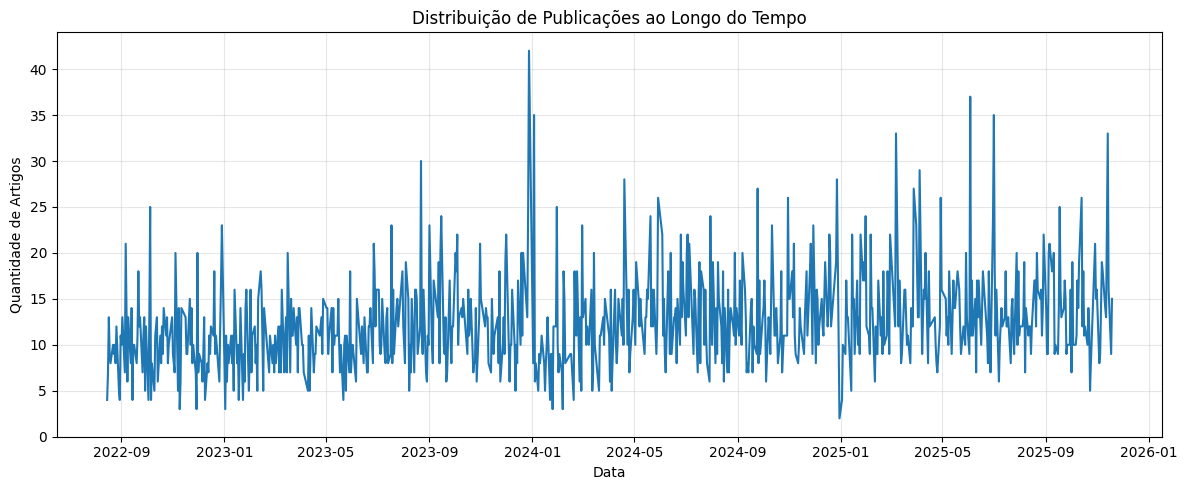

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

result['publication_date'] = pd.to_datetime(result['publication_date'], errors='coerce')

plt.figure(figsize=(12,5))
result['publication_date'].dt.date.value_counts().sort_index().plot()
plt.title("Distribuição de Publicações ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Quantidade de Artigos")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

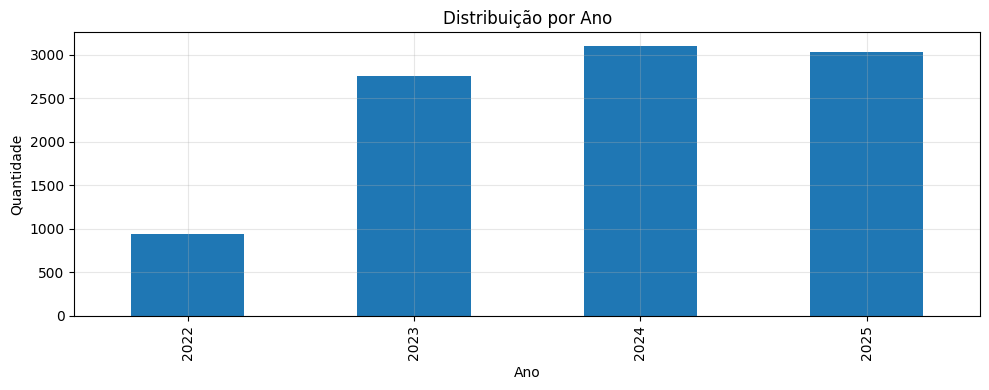

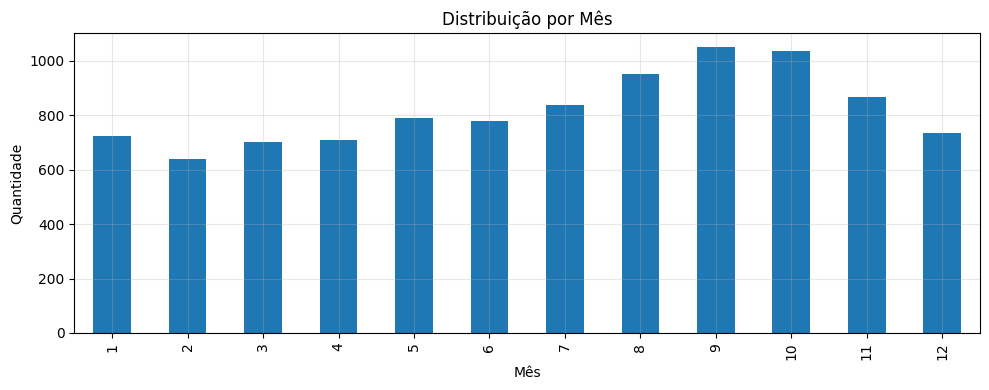

In [6]:
plt.figure(figsize=(10,4))
result['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribuição por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
result['month'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribuição por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

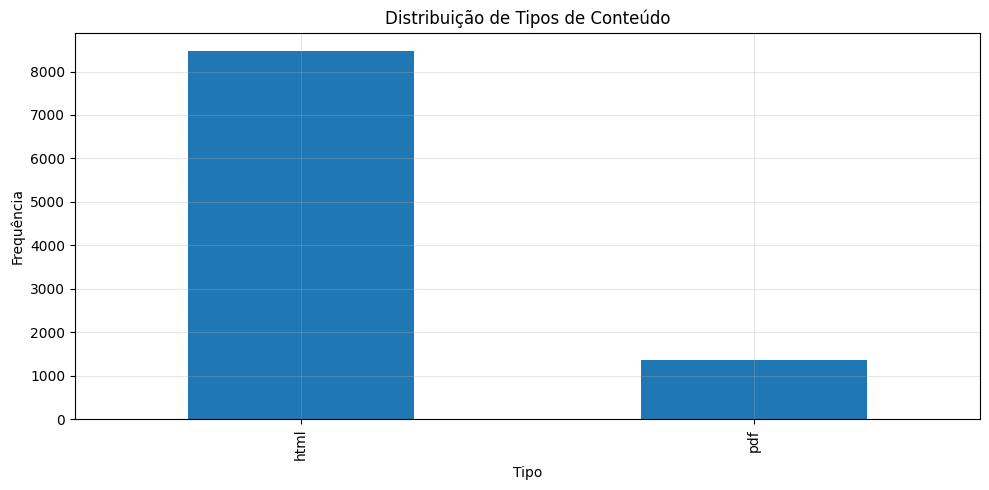

In [7]:
plt.figure(figsize=(10,5))
result['content_type'].value_counts().plot(kind='bar')
plt.title("Distribuição de Tipos de Conteúdo")
plt.xlabel("Tipo")
plt.ylabel("Frequência")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

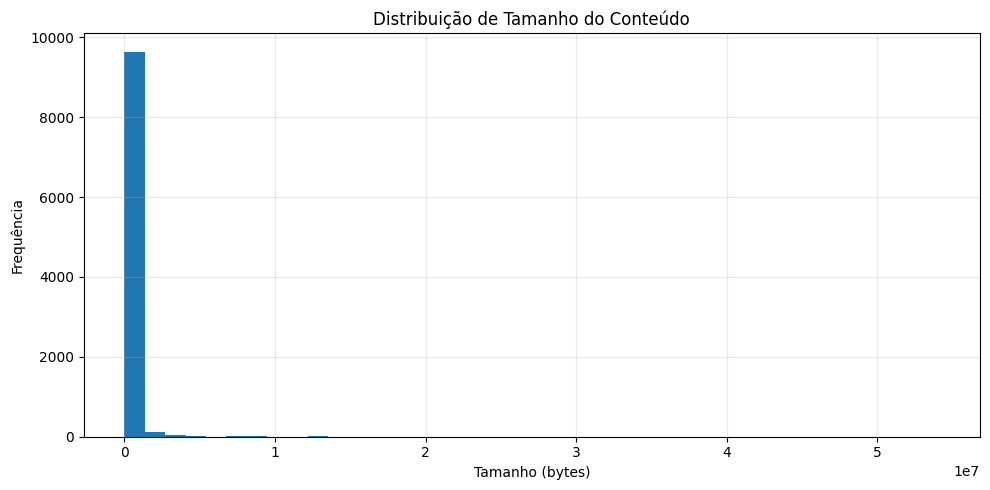

In [8]:
plt.figure(figsize=(10,5))
plt.hist(result['content_size'], bins=40)
plt.title("Distribuição de Tamanho do Conteúdo")
plt.xlabel("Tamanho (bytes)")
plt.ylabel("Frequência")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

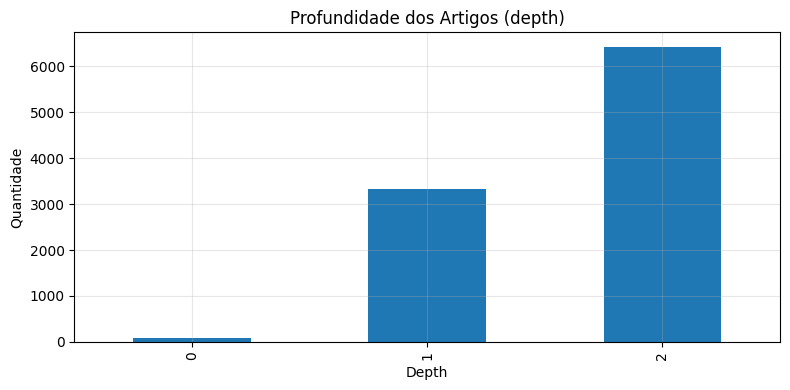

In [9]:
plt.figure(figsize=(8,4))
result['depth'].value_counts().sort_index().plot(kind='bar')
plt.title("Profundidade dos Artigos (depth)")
plt.xlabel("Depth")
plt.ylabel("Quantidade")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

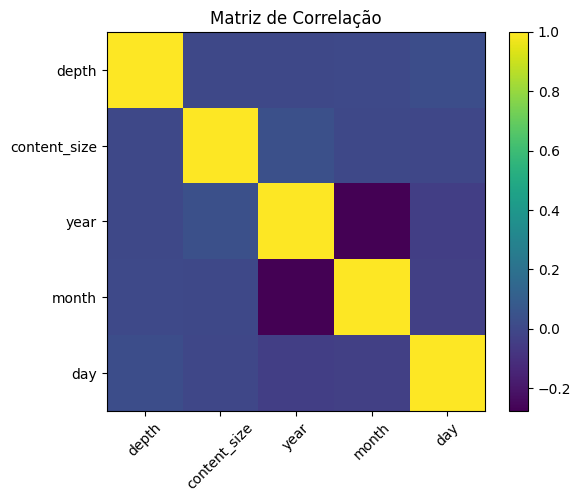

In [10]:
plt.figure(figsize=(6,5))
plt.imshow(result[['depth','content_size','year','month','day']].corr(), cmap='viridis')
plt.colorbar()
plt.title("Matriz de Correlação")
plt.xticks(range(5), ['depth','content_size','year','month','day'], rotation=45)
plt.yticks(range(5), ['depth','content_size','year','month','day'])
plt.tight_layout()
plt.show()

Quantidade máxima de níveis observada: 2


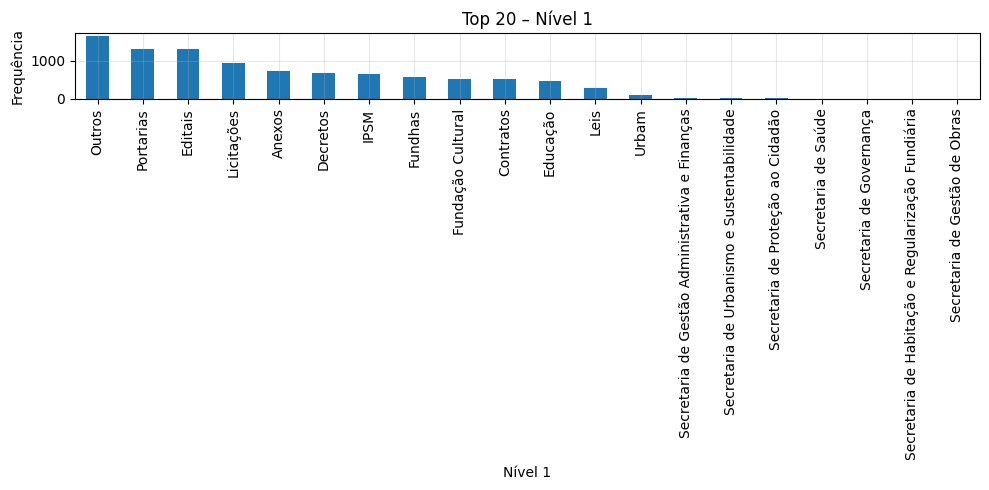

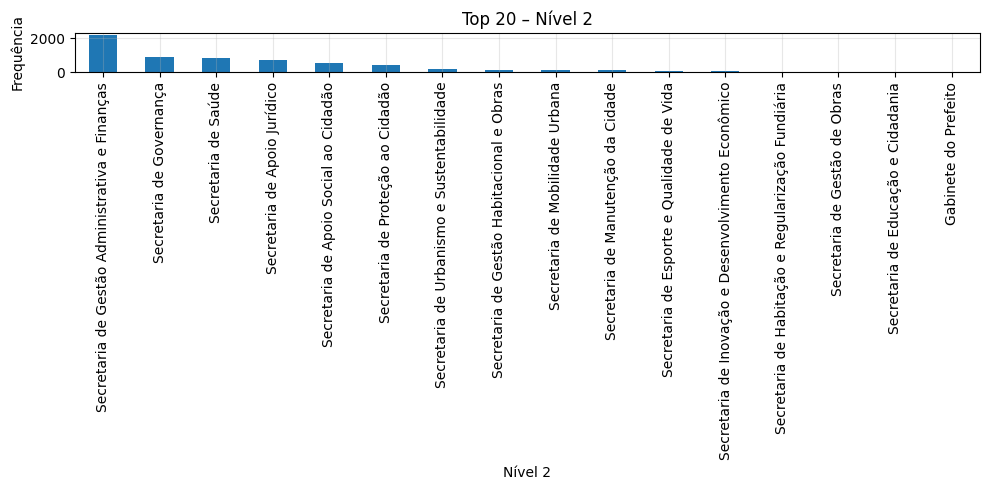

In [11]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


def parse_list(x):
    try:
        return ast.literal_eval(x)
    except:
        return None

result['hier_list'] = result['hierarchy_path'].apply(parse_list)
parsed = result[result['hier_list'].notnull()].copy()

# ----------------------------------------------------------
# 2. Determinar o número máximo de níveis no dataset
# ----------------------------------------------------------
parsed['levels'] = parsed['hier_list'].apply(len)
max_levels = parsed['levels'].max()

print(f"Quantidade máxima de níveis observada: {max_levels}")

# ----------------------------------------------------------
# 3. Criar colunas dinamicamente: level_1 ... level_max
# ----------------------------------------------------------
for i in range(int(max_levels)):
    parsed[f'level_{i+1}'] = parsed['hier_list'].apply(
        lambda x, i=i: x[i] if len(x) > i else None
    )

# ----------------------------------------------------------
# 4. Top categorias de cada nível
# ----------------------------------------------------------
for lvl in range(1, max_levels+1):
    col = f'level_{lvl}'
    freq = parsed[col].value_counts().head(20)

    plt.figure(figsize=(10,5))
    freq.plot(kind='bar')
    plt.title(f"Top 20 – Nível {lvl}")
    plt.xlabel(f"Nível {lvl}")
    plt.ylabel("Frequência")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
